## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
total = df['user_id'].unique().shape[0]
total

290584

d. The proportion of users converted.

In [11]:
conv = df[df['converted']==1]['user_id'].shape[0]
ratio = conv/total
ratio

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
df[ ((df['group']!='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='treatment') & (df['landing_page']=='old_page')) ].shape[0]

3893

f. Do any of the rows have missing values?

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


No, it's clearly visible that all rows have non-null values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df['group']=='treatment') & (df['landing_page']=='new_page')) | ((df['group']=='control') & (df['landing_page']=='old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [6]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [26]:
df2['user_id'].unique().shape[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [7]:
df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


User_id repeated in df2 is 773192.

c. What is the row information for the repeat **user_id**? 

In [8]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [9]:
df2 = df2.drop_duplicates(subset = 'user_id')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [11]:
conv = df2[df2['converted']==1]['user_id'].unique().shape[0]
print(conv)
total = df2['user_id'].unique().shape[0]
print(total)
probability = conv/total
print(probability)

34753
290584
0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [12]:
total = df2[df2['group']=='control']['user_id'].unique().shape[0]
conv = df2[((df2['converted']==1) & (df2['group']=='control'))]['user_id'].unique().shape[0]
prob = conv/total
print(prob)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [13]:
total = df2[df2['group']=='treatment']['user_id'].unique().shape[0]
conv = df2[((df2['converted']==1) & (df2['group']=='treatment'))]['user_id'].unique().shape[0]
probab = conv/total
print(probab)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [14]:
new = df[df['landing_page']=='new_page']['user_id'].unique().shape[0]
tot = df['user_id'].unique().shape[0]
print(new/tot)

0.5035273793464197


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Actually, users in the control group have a higher probability of converting than those in the treatment group. That is, people receiving the earlier page have a higher chance of converting, hence it seems that the new treatment page leads to lesser conversions, although the difference is very less. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

   >Null hypothesis will be : **$p_{old}$** >= **$p_{new}$**
   >
   >Alternate hypothesis will be : **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [15]:
conv = df2[df2['converted']==1]['user_id'].unique().shape[0]
total = df2['user_id'].unique().shape[0]
pold = pnew = conv/total
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [16]:
pold

0.11959708724499628

c. What is $n_{new}$?

In [17]:
n_new = df2[ df2['landing_page'] == 'new_page' ]['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [18]:
n_old = df2[ df2['landing_page'] == 'old_page' ]['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [19]:
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-pnew, pnew])

print(new_page_converted)

[0 0 1 ..., 0 0 0]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [20]:
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-pold, pold])

print(old_page_converted)

[0 0 0 ..., 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [22]:
new_page_converted.mean() - old_page_converted.mean()

-5.0093878496776378e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [39]:
diffs = []
for _ in range(10000):
    new_conv = np.random.choice([0,1], size=n_new, p=[1-pnew, pnew])
    old_conv = np.random.choice([0,1], size=n_old, p=[1-pold, pold])
    diff = new_conv.mean() - old_conv.mean()
    diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [48]:
obs_diff = df2.query('landing_page=="new_page"')['converted'].mean() - df2.query('landing_page=="old_page"')['converted'].mean()
obs_diff

-0.0015782389853555567

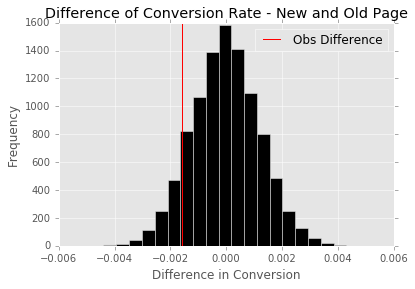

In [59]:
plt.hist(diffs, bins=20, color='black')
plt.title('Difference of Conversion Rate - New and Old Page')
plt.xlabel('Difference in Conversion')
plt.ylabel('Frequency')
plt.axvline(x=(obs_diff), color = 'red', label = 'Obs Difference')
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [54]:
diffs = np.array(diffs)
mean_val = ( diffs > obs_diff ).mean()
mean_val

0.9022

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The computed value is known as p-value. What we observe here is the fact that there is an extremely high chance (>0.9) that the observed statistic actually came from this simulated distribution, which is built on the null hypothesis. Hence, we cannot reject the null hypothesis and have to accept that the old page did have a better conversion rate than the new page, and the new page is worse than the earlier page. Here, we have chosen a type-I error rate of 5%, which mean that we won't reject the null hypothesis unless the p-value is below 0.05. And in our case, the p-value is much higher than that, and hence we won't reject the null hypothesis. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [10]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" and converted == 1')['user_id'])
convert_new = len(df2.query('landing_page == "new_page" and converted == 1')['user_id'])
n_old = len(df2.query('landing_page == "old_page"')['user_id'])
n_new = len(df2.query('landing_page == "new_page"')['user_id'])

print('Number of conversions for old page: ', convert_old)
print('Number of conversions for new page: ', convert_new)
print('Number of rows (old page): ', n_old)
print('Number of rows (new page): ', n_new)

Number of conversions for old page:  17489
Number of conversions for new page:  17264
Number of rows (old page):  145274
Number of rows (new page):  145311


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [26]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old], alternative='larger')
print('Z-score: ', z_score)
print('P-value: ', p_value)

Z-score:  -1.31092419842
P-value:  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score refers to how many standard deviations far the statistic is from the mean value. The p-value is also quite large(>0.9), so we fail to reject the null. The p-value we derived in this case is quite close to what we got from earlier case.    **

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**As output is of 2 classes (converted and not converted), we can use the logistic regression model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [12]:
df2['intercept'] = 1

df2[['ab_page_to_drop', 'ab_page']] = pd.get_dummies(df2['group'])

df2 = df2.drop(['ab_page_to_drop'], axis=1)

df2.head()

C:\Users\srijon sarkar\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\srijon sarkar\Anaconda3\lib\site-packages\pandas\core\frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0.0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [13]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Jun 2018   Pseudo R-squ.:               8.085e-06
Time:                        10:21:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**A low p-value means that the predictors are very significant to the changes. This p-value is too high to reject the null hypothesis, reflecting that the changes in the explanatory are not associated with the changes in the response value. In this part, compared to Part-II, the p-value associated with the alternative hypothesis is the P>|z| value of ab_page in the model. This value tests if the paramater of the slope is equal to null hypothesis and checks whether the changes in the variables are related to changes to the output variable.  **

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**A few factors that could be considered to be added as parameters are age, or time duration spent on the page. These factors could likely contribute to the ultimate decision(converted or not).
However, adding many factors to our analysis decreases the effect of each of them. It is important to only retain those which have a significant impact on the outcome.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [15]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head()

df_new.groupby('country')['country'].count()

country
CA     14499
UK     72466
US    203620
Name: country, dtype: int64

In [18]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

df_new = df_new.drop(['CA'], axis=1)

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1.0,0.0,1.0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1.0,0.0,1.0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0.0,0.0,1.0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1.0,0.0,1.0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1.0,0.0,1.0


In [19]:
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'UK', 'US']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 11 Jun 2018   Pseudo R-squ.:               2.324e-05
Time:                        10:23:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**The p-value associated with the countries are on the higher side. We would like to see a low value, as it would mean that they actually affect the activity of the user. However, it seems that the country of the user doesn't have an influence on the user, due to the high p-values.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [24]:
### Fit Your Linear Model And Obtain the Results
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US_ab_page','UK_ab_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 11 Jun 2018   Pseudo R-squ.:               3.352e-05
Time:                        11:02:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.06778
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0827      0.038     -2.176      0.030      -0.157      -0.008
US_ab_page     0.0644      0.038      1.678      0.093      -0.011       0.140
UK_ab_page     0.0901      0.040      2.225      0.026       0.011       0.169
==============================================================================
"""

**As we can see, the P>|z| value for the countries along with ab_page is kind of low now. This is better than earlier, as it seems that these attributes are significant in the deciding the activity of the user.**

<a id='conclusions'></a>
## Conclusions

> As we noticed, we could not reject the null hypothesis(that the old page was better than the new page in terms of conversions) and hence stand by it. 
>
> The new page needs to be improved before running the tests again. Also, we cannot claim that a higher proportion of users were subjected to any particular page, as the chances of receiving eithe page is close to 50%. So the test was pretty fair. 
>
> Some small factors like change aversion however, have not been taken into account.
>
> Upon adding the country information, we don't get any additional benifits. Hence it can be concluded that the country doesn't really influence the user activity.
> 
> A few parameters, like time spent on the page amd age of the person can be added and their effect analysed on the outcome. 


#### SOURCES
> Wikipedia
>
>http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
>
>https://en.wikipedia.org/wiki/Standard_score
>
>http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm